In [ ]:
# Author : Marion Estoup
# E-mail : marion_110@hotmail.fr
# April 2023

**BERT FINE TUNING**

Text Classification

BERT Bidirectional Encoder Representations from Transformers. It's a method of pre-training for linguistic representations

In [1]:
# Install library
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.9/518.9 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 14.3 MB/s eta 0:00:00


In [2]:
# Import data
# Link : https://huggingface.co/datasets/solomonk/reddit_mental_health_posts
from datasets import load_dataset

dataset = load_dataset("solomonk/reddit_mental_health_posts")

Repo card metadata block was not found. Setting CardData to empty.


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

In [3]:
# Display the first rows of our data
first_example = dataset['train'][0]
first_example

{'author': 'HotConversation1273',
 'body': 'A few months ago I was accepted into this full time software engineering fellowship and it’s made me realize that I CANNOT work sustainably to save my life. It’s so hard to prioritize my time when I get so hyper focused on each task or just on something completely irrelevant. \n\nI was just diagnosed last year so I’m still learning how to learn with ADHD but I feel even more pressure to work so much harder to prove my worth bc I’m a Black woman in engineering. I’ve been falling into a really unhealthy cycle of taking more than my prescribed dose to work longer bc I’d waste so much time during the day and it’s just gotten out of hand. it’s like you go your whole life feeling so dumb and incompetent and now you don’t and you just wanna learn everything all the time but that’s just??? not sustainable or normal. anyways idk sorry for the rant, I’m just tired & don’t know what to do',
 'created_utc': '2021-12-22T18:32:56.000Z',
 'id': 'rmbjwb',
 '

In [4]:
import pandas as pd

# Convert dataset to a pandas dataframe
df = pd.DataFrame(dataset['train'])

# Save dataframe as csv file
df.to_csv('dataset.csv', index=False)

In [5]:
# Load the dataset
df = pd.read_csv('dataset.csv')

# Report the number of sentences
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data
df.sample(10)

Number of training sentences: 151,288



author  \
56653        leslie_knope89   
75376        FabledSquirrel   
93476   burnafterreading343   
27234       blabbedybloobla   
31837          Own-Use-8223   
140210            [deleted]   
87618             [deleted]   
71783         Emotional_Nap   
1799            improbsable   
118696            [deleted]   

                                                     body  \
56653   I have always had fits of crying in my life, b...   
75376                                           [removed]   
93476   I (18M) have been seeing this person (18F) rec...   
27234   I'm not planning to go to prison. But I was th...   
31837   Warning…. This is a long one 🤦🏽‍♀️\n\n\nI was ...   
140210                                          [deleted]   
87618                                           [deleted]   
71783   I was laying down and I got a thought in my he...   
1799                                            [removed]   
118696                                          [removed]   

                     created_utc      id  num_comments  score   subreddit  \
56653   2021-03-12T01:31:50.000Z  m369ji             3      2   aspergers   
75376   2021-11-23T14:17:29.000Z  r0e7mm             0      1  depression   
93476   2021-10-20T02:11:58.000Z  qbqnqr             3      2         OCD   
27234   2021-10-25T15:44:31.000Z  qfjkg5             5      4        ADHD   
31837   2021-10-14T20:32:40.000Z  q885vm             2      2        ADHD   
140210  2020-10-16T05:25:01.000Z  jc3zsq            25     14        ptsd   
87618   2021-11-30T04:45:11.000Z  r5f1b8             0      1         OCD   
71783   2021-11-30T09:33:38.000Z  r5jm9i             8     40  depression   
1799    2021-12-18T09:31:21.000Z  rj3ymi             1      1        ADHD   
118696  2021-05-05T16:10:14.000Z  n5jlka             4      8         OCD   

                                                    title  upvote_ratio  \
56653                          Uncontrollable crying fits          1.00   
75376   [IMPORTANT] Please be careful talking to peopl...          1.00   
93476   I can’t tell if I sexually assaulted someone o...          0.75   
27234          What is prison like for someone with ADHD?          0.84   
31837                                Adderall confuses me          1.00   
140210  What’s the worst thing someone has said to you...          0.94   
87618      I need advice on how to handle new compulsions          1.00   
71783                             Too lazy to kill myself          1.00   
1799                      Is there a crash from Adderall?          1.00   
118696  I am convinced that I have always been the pro...          1.00   

                                                      url  
56653   https://www.reddit.com/r/aspergers/comments/m3...  
75376   https://www.reddit.com/r/depression/comments/r...  
93476   https://www.reddit.com/r/OCD/comments/qbqnqr/i...  
27234   https://www.reddit.com/r/ADHD/comments/qfjkg5/...  
31837   https://www.reddit.com/r/ADHD/comments/q885vm/...  
140210  https://www.reddit.com/r/ptsd/comments/jc3zsq/...  
87618   https://www.reddit.com/r/OCD/comments/r5f1b8/i...  
71783   https://www.reddit.com/r/depression/comments/r...  
1799    https://www.reddit.com/r/ADHD/comments/rj3ymi/...  
118696  https://www.reddit.com/r/OCD/comments/n5jlka/i...

The two variables that we are interested in are Body(text) and Subreddit(label)

We can display 5 sentences that belong to the class "depression" with the following command :

In [6]:
df.loc[df.subreddit == 'depression'].sample(5)[['body','subreddit']]

body   subreddit
73252                                          [removed]  depression
76777                                          [removed]  depression
60562  I just recently lost my 91 year old grandmothe...  depression
71899                                          [deleted]  depression
78111  I had the weight lifted off my shoulders with ...  depression

#Clean text

There are some "useless" information such as emojis, URLs, ... So we can clean the text before training the model



Remove rows where we don't have text (it's written removed, deleted, nan, ...)

In [7]:
# Let's see if there are any null values present in our dataset
df.isnull().sum()

author             0
body            1609
created_utc        0
id                 0
num_comments       0
score              0
subreddit          0
title              0
upvote_ratio       0
url                0
dtype: int64

In [8]:
# Let's drop the null values
df.dropna(inplace=True)
df.isnull().sum()

author          0
body            0
created_utc     0
id              0
num_comments    0
score           0
subreddit       0
title           0
upvote_ratio    0
url             0
dtype: int64

In [10]:
df.sample(10) # We still have [deleted] and [removed]

author                                               body  \
146204     weeniewrrm  TW: Light mention of sexual assault\n\nSo for ...   
77848       [deleted]                                          [deleted]   
46055       [deleted]                                          [deleted]   
143983       Kpopkinz  Im still shaking I don’t even know how long it...   
87959       [deleted]                                          [deleted]   
5311      AHEMCOUGHHH  So throughout my life my ADHD has made relatio...   
111902    braintrain2  Hey folks. I’ve been under the care of a psych...   
31855        Ellestyx  **Edit**: JUST TO CLARIFY, I’m not asking for ...   
107273      [deleted]                                          [deleted]   
132198  symmetryfairy  The thing about an abusive relationship is tha...   

                     created_utc      id  num_comments  score   subreddit  \
146204  2020-02-22T02:03:10.000Z  f7lt36             5      7        ptsd   
77848   2021-11-18T20:39:09.000Z  qwz113             0      1  depression   
46055   2021-08-14T04:20:47.000Z  p419py             0      1   aspergers   
143983  2020-05-22T07:55:16.000Z  gof2uf             6      4        ptsd   
87959   2021-11-27T22:56:24.000Z  r3p8p0             0      1         OCD   
5311    2021-12-10T16:57:02.000Z  rdd11e             3      1        ADHD   
111902  2021-06-20T00:05:58.000Z  o3t72y             5      3         OCD   
31855   2021-10-14T19:43:16.000Z  q876n3             6      2        ADHD   
107273  2021-07-19T23:25:36.000Z  onpwov             2      3         OCD   
132198  2021-07-26T05:44:48.000Z  orsgvw             2     12        ptsd   

                                                    title  upvote_ratio  \
146204                    Am I valid for quitting my job?          1.00   
77848   I'm sick and tired of beating around the bush ...          1.00   
46055                                     Stomach Isssues          1.00   
143983  (TW sexual assault) I just had the worst flash...          1.00   
87959   Ocd theme going longer then others strange thi...          1.00   
5311                        I’m scared it’ll happen again          1.00   
111902  OCD without apparent compulsions ? Can the obs...          1.00   
31855               Confused about medication combination          0.75   
107273  Could anyone tell me a bit more about sexual t...          1.00   
132198            Searching for safety in an unsafe world          1.00   

                                                      url  
146204  https://www.reddit.com/r/ptsd/comments/f7lt36/...  
77848   https://www.reddit.com/r/depression/comments/q...  
46055   https://www.reddit.com/r/aspergers/comments/p4...  
143983  https://www.reddit.com/r/ptsd/comments/gof2uf/...  
87959   https://www.reddit.com/r/OCD/comments/r3p8p0/o...  
5311    https://www.reddit.com/r/ADHD/comments/rdd11e/...  
111902  https://www.reddit.com/r/OCD/comments/o3t72y/o...  
31855   https://www.reddit.com/r/ADHD/comments/q876n3/...  
107273  https://www.reddit.com/r/OCD/comments/onpwov/c...  
132198  https://www.reddit.com/r/ptsd/comments/orsgvw/...

In [11]:
# Filter and remove rows
df = df[(df['body'] != 'deleted') & (df['body'] != 'removed') & (~df['body'].isna())]

Remove URLs, emojis, tags and punctuation

In [12]:
# Import libraries
import string
import re

In [13]:
from pygments.token import Text
# Helper functions to clean text by removing urls, emojis, html tags and punctuations
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)


def remove_punct(text):
  # remove punctuations
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

def remove_newlines(text):
  # Remove newlines and extra whitespaces
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text
def remove_digits(text):
  # remove numbers and digits
  text = re.sub(r'\w*\d\w*', '', text) # Or maybe \d+ could work
  return text

In [14]:
df['body'] = df['body'].apply(lambda x:remove_URL(x))
df['body'] = df['body'].apply(lambda x:remove_emoji(x))
df['body'] = df['body'].apply(lambda x:remove_html(x))
df['body'] = df['body'].apply(lambda x:remove_punct(x))
df['body'] = df['body'].apply(lambda x:remove_digits(x))

In [15]:
# More cleaning
def remove_repetitive_letters(text):
    pattern = r'(\w)\1{2,}'  # Matches a letter repeated more than 2 times
    cleaned_text = re.sub(pattern, r'\1', text)
    return cleaned_text

df['body'] = df['body'].apply(lambda x: remove_repetitive_letters(x))

In [16]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df['body'] = df['body'].apply(lambda x: expand_contractions(x))

#Remove stopwords

Stopwords are words that are not considered as interesting for our study (don't bring additional or important information to the text).

In [17]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

def clean_text(text):

  # Convert to lowercase
  text = text.lower()

  # Remove stopwords
  stop_words = set(stopwords.words('english'))
  tokens = word_tokenize(text)
  text = ' '.join([token for token in tokens if token not in stop_words])

  return text


df['body'] = df['body'].apply(lambda x:clean_text(x))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [18]:
df.loc[df.subreddit == 'OCD'].sample(5)[['body','subreddit']]

body subreddit
106799  chaos order fundamental elements every lived s...       OCD
118778                                            deleted       OCD
100854                                            deleted       OCD
89384   ive suffering really awful pure ocd years im s...       OCD
105914  ive couple sessions therapist really helped un...       OCD

#EDA : Exploratory Data Analysis

Data Distribution

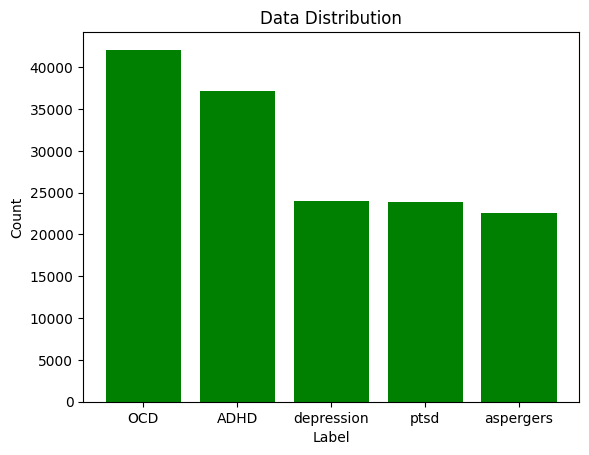

In [19]:
import matplotlib.pyplot as plt

# Count the occurrence of each label
label_counts = df['subreddit'].value_counts()

# Get the labels and their counts
labels = label_counts.index.tolist()
counts = label_counts.tolist()

# Plot the data distribution
plt.bar(labels, counts, color='green')

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Data Distribution')

# Show the plot
plt.show()


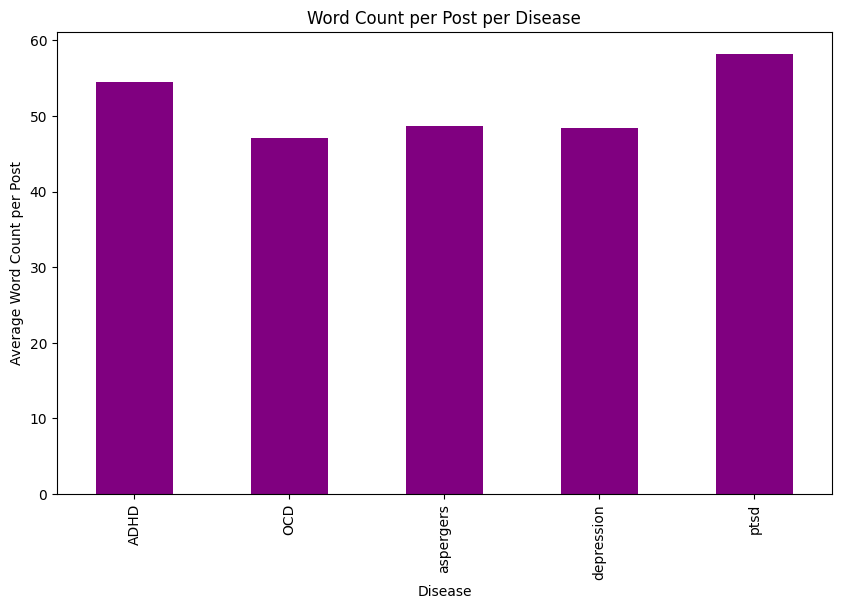

In [20]:
# Calculate word count for each tweet
df['word_count'] = df['body'].str.split().apply(len)

# Group the data by disease and calculate the average word count per disease
disease_word_count = df.groupby('subreddit')['word_count'].mean()

# Plot the word count per tweet per category
disease_word_count.plot(kind='bar', figsize=(10, 6), color='purple')
plt.xlabel('Disease')
plt.ylabel('Average Word Count per Post')
plt.title('Word Count per Post per Disease')
plt.show()

Document Term Matrix (matrix that gives words frequencies in a text)

In [21]:
# Let's group our cleaned texts by subreddits in a new dataframe
df_grouped = df[['subreddit','body']].groupby(by='subreddit').agg(lambda x:' '.join(x))
df_grouped.head()

body
subreddit                                                    
ADHD        months ago accepted full time software enginee...
OCD         know title post sounds gross idea talk person ...
aspergers   wish could poll would think autonomous territo...
depression  sure counts selfpity ’ big baby selfvictimizer...
ptsd        year felt like literal hell ’ ’ happy ’ embarr...

In [22]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(analyzer='word')
data = cv.fit_transform(df_grouped['body'])
df_dtm = pd.DataFrame(data.toarray(), columns = cv.get_feature_names_out())
df_dtm.index = df_grouped.index

In [23]:
df_dtm.head()

aa  aaaaaaaaaa  aaah  aaahhzhzhgrh  aaand  aaandill  aaaron  aab  \
subreddit                                                                      
ADHD        12           0     0             0      1         1       0    2   
OCD          8           1     1             0      0         0       0    0   
aspergers    8           0     0             1      2         0       0    0   
depression  13           0     0             0      0         0       0    0   
ptsd        14           0     0             0      1         0       1    0   

            aabout  aac  ...  يفارقني  يفكر  يكون  ينغمسون  يوجد  يوميا  چى  \
subreddit                ...                                                  
ADHD             0    0  ...        0     0     0        0     0      0   0   
OCD              0    0  ...        2     1     1        1     1      1   0   
aspergers        0    5  ...        0     0     0        0     0      0   0   
depression       0    0  ...        0     0     0        0     0      0   1   
ptsd             1    0  ...        0     0     0        0     0      0   0   

            ಠಠ  ᕦòóˇᕤ  ℙℙ  
subreddit                  
ADHD         3      1   0  
OCD          1      0   0  
aspergers    0      0   0  
depression   0      0   1  
ptsd         0      0   0  

[5 rows x 94529 columns]

#Wordclouds

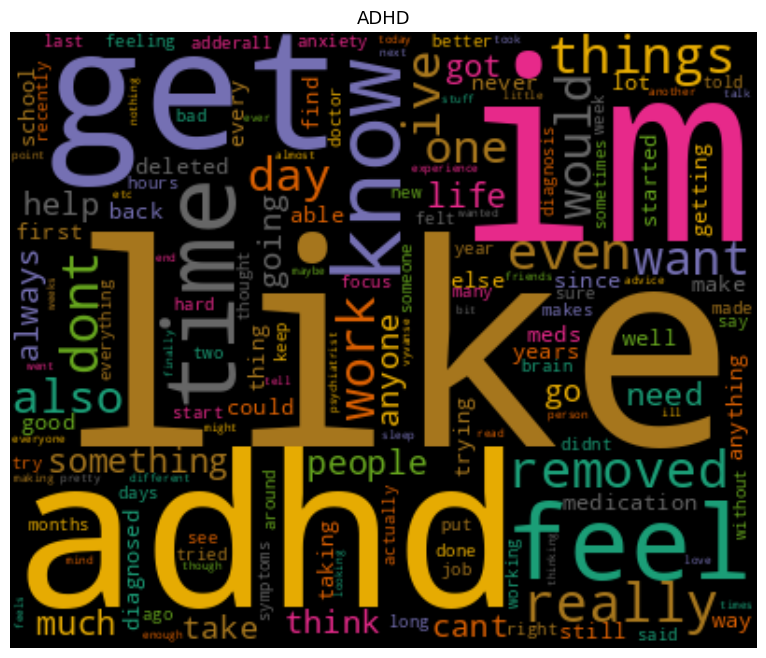

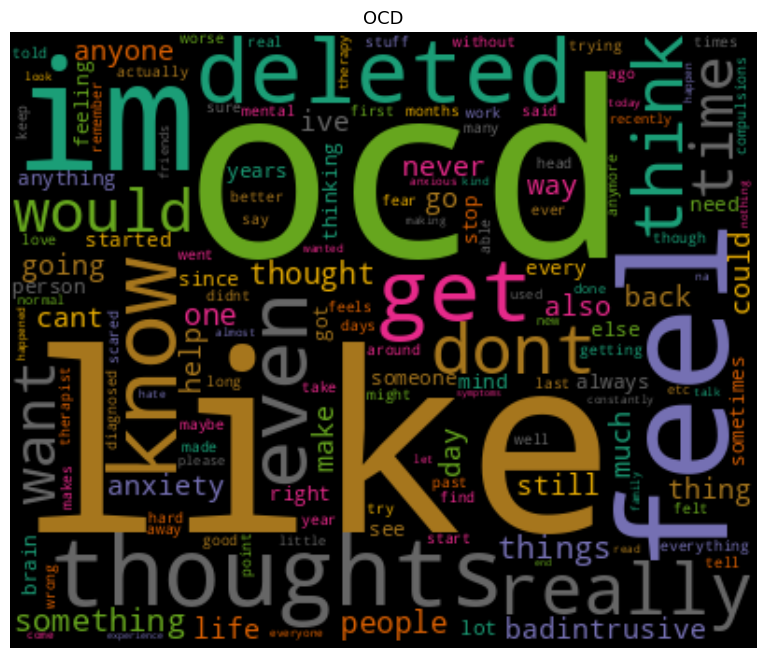

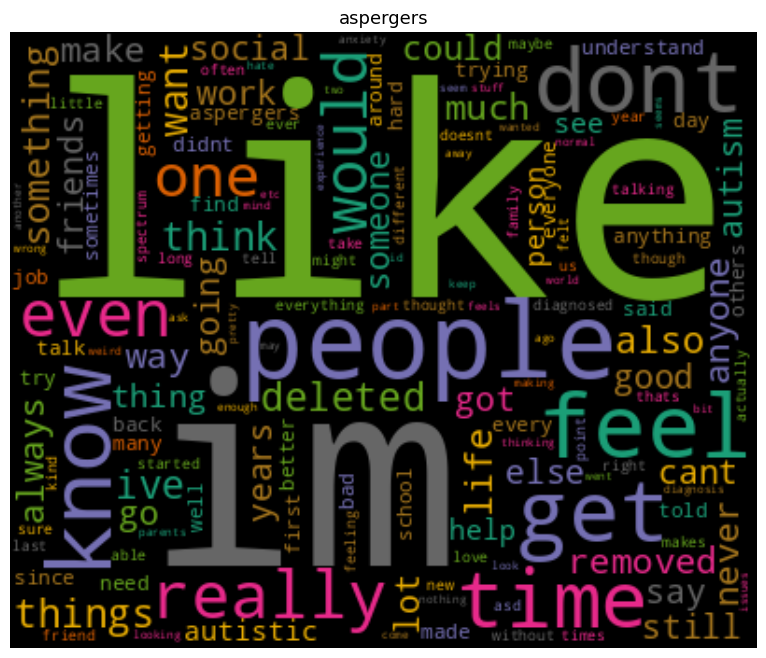

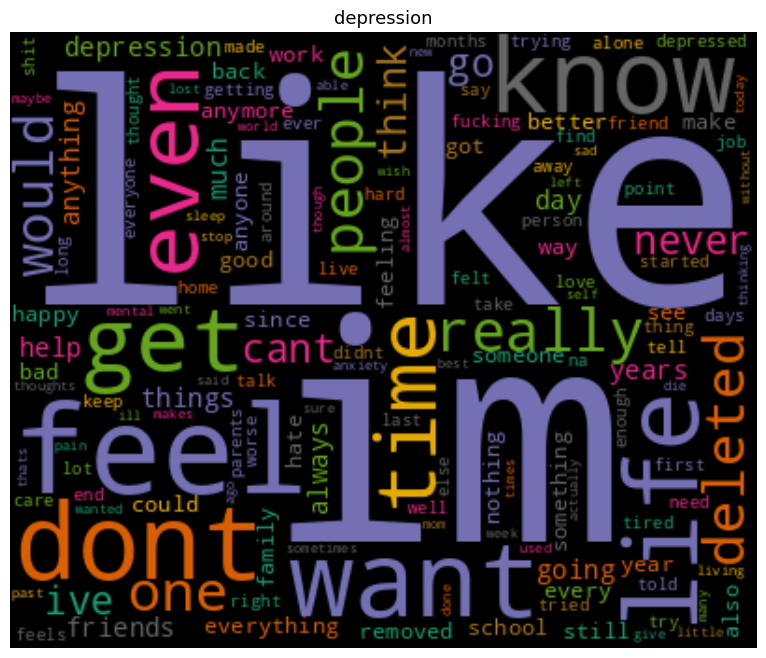

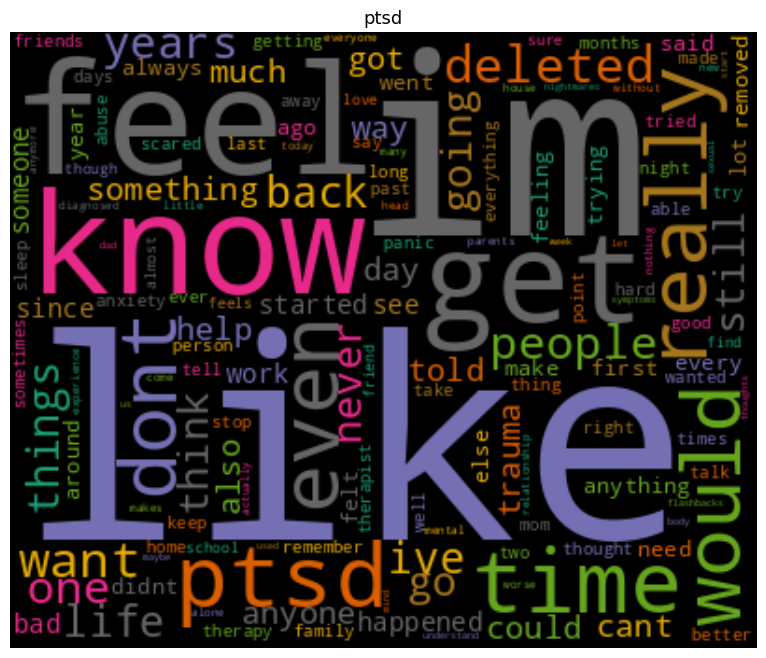

In [24]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data, title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

# Transposing document term matrix
df_dtm = df_dtm.transpose()

# Plotting word cloud for each label
for index, label in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[label].sort_values(ascending=False),label)

**Polarity (Sentiment) Analysis**

In [25]:
# Import library
from textblob import TextBlob

# Polarity analysis
df['polarity'] = df['body'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [26]:
# let's take a look at some posts
print("3 Random posts with Highest Polarity:")
for index,post in enumerate(df.loc[df['polarity'].sort_values(ascending=False)[:3].index]['body']):
  print('Post {}:\n'.format(index+1),post)

3 Random posts with Highest Polarity:
Post 1:
 hello everyone keep ocd overthinking something imagen best spot messing head guys
Post 2:
 excellent stem
Post 3:
 got today got sleeping really best


In [27]:
print("3 Random posts with Lowest Polarity:")
for index,review in enumerate(df.loc[df['polarity'].sort_values(ascending=True)[:3].index]['body']):
  print('Post {}:\n'.format(index+1),review)

3 Random posts with Lowest Polarity:
Post 1:
 read someones ocd predicting numbers correct cant help feel anxiousnow terrible anxiety pls help get rational
Post 2:
 ’ miserable suicidal
Post 3:
 hurts ’ know stop feels like ’ miserable forever


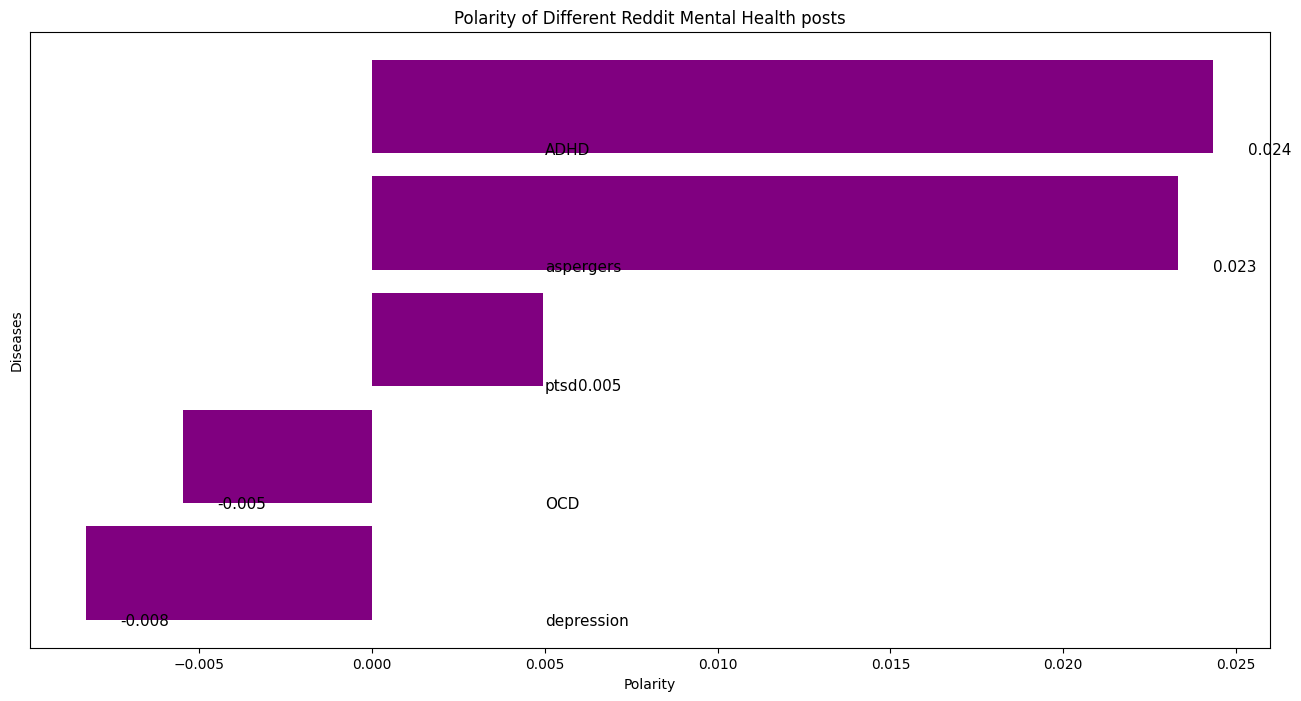

In [28]:
import numpy as np
# Let's plot polarity of posts for each mental disease
post_polarity_sorted = pd.DataFrame(df.groupby('subreddit')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Diseases')
plt.title('Polarity of Different Reddit Mental Health posts')
polarity_graph = plt.barh(np.arange(len(post_polarity_sorted.index)),post_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,disease in zip(polarity_graph,post_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(disease),va='center',fontsize=11,color='black')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,post_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')

plt.yticks([])
plt.show()